In [406]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [407]:
df=pd.read_csv('dataset.csv')

In [408]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
Age                100 non-null int64
Temperature        100 non-null float64
State              100 non-null object
Type of Visit      100 non-null object
Number of Cases    100 non-null int64
Suspect            100 non-null int64
dtypes: float64(1), int64(3), object(2)
memory usage: 4.8+ KB


In [409]:
df.head()

,Age,Temperature,State,Type of Visit,Number of Cases,Suspect
0,20,98.6,Kerala,airport,561,0
1,34,98.6,Kerala,salon,561,0
2,43,100.0,Kerala,public_transport,561,0
3,45,101.0,Delhi,church,8470,1
4,24,98.6,Telangana,temple,1367,0


In [410]:
df.describe()

,Age,Temperature,Number of Cases,Suspect
count,100.000000,100.000000,100.000000,100.000000
mean,45.610000,99.848000,8435.100000,0.310000
std,20.641674,1.753869,10690.176284,0.464823
min,3.000000,98.600000,43.000000,0.000000
25%,27.000000,98.600000,745.500000,0.000000
50%,45.000000,98.600000,2981.500000,0.000000
75%,61.250000,101.050000,25992.000000,1.000000
max,96.000000,104.200000,25992.000000,1.000000


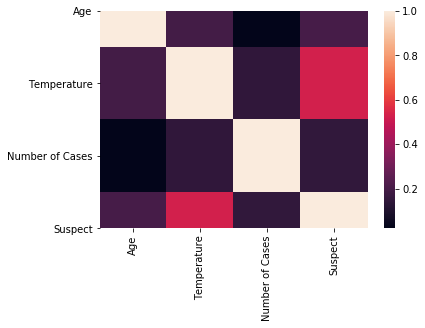

In [411]:
sns.heatmap(df.corr())

In [412]:
df['Number of Cases'].unique()

array([  561,  8470,  1367,  4418,   807,  3758,    43,  9227,   971,
         981, 25992,  1924,  2205], dtype=int64)

In [413]:
lookup=dict(zip(df['State'],df['Number of Cases']))

[Text(0, 0, 'Maharashtra'),
 Text(0, 0, 'Kerala'),
 Text(0, 0, 'Haryana'),
 Text(0, 0, 'Uttar Pradesh'),
 Text(0, 0, 'Delhi'),
 Text(0, 0, 'Karnataka'),
 Text(0, 0, 'Rajasthan'),
 Text(0, 0, 'Ladakh'),
 Text(0, 0, 'Jammu and Kashmir'),
 Text(0, 0, 'Punjab'),
 Text(0, 0, 'Tamil Nadu'),
 Text(0, 0, 'Telangana'),
 Text(0, 0, 'Andhra Pradesh')]

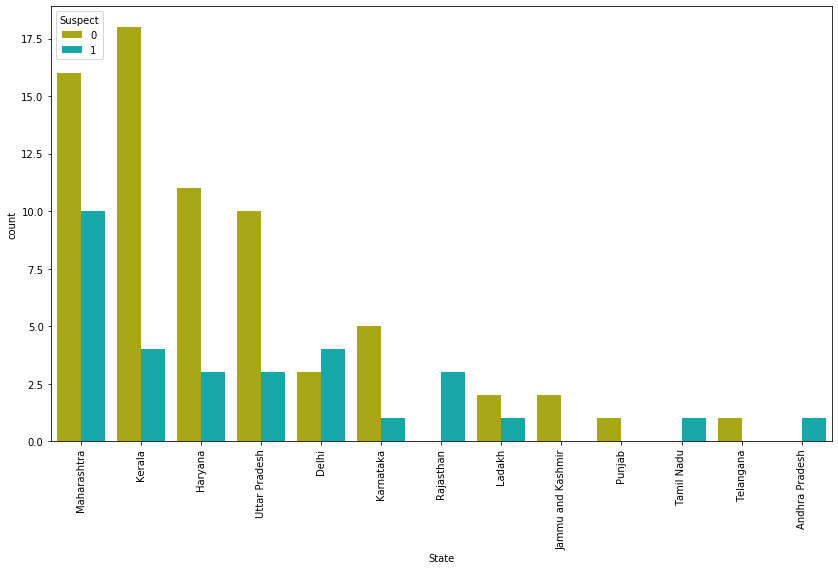

In [414]:
fig,ax=plt.subplots(figsize=(14,8))
g=sns.countplot(x='State',hue='Suspect',data=df,ax=ax,order=df['State'].value_counts().index,palette=['y','c'])
g.set_xticklabels(g.get_xticklabels(), rotation=90)

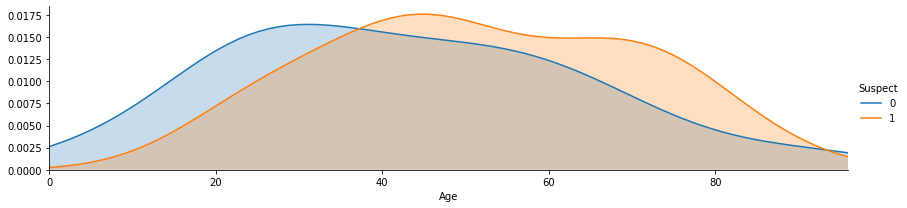

In [415]:
facet=sns.FacetGrid(df,hue='Suspect',aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,df['Age'].max()))
facet.add_legend()

[Text(0, 0, 'hospital'),
 Text(0, 0, 'salon'),
 Text(0, 0, 'restaurant'),
 Text(0, 0, 'temple'),
 Text(0, 0, 'pharmacy'),
 Text(0, 0, 'church'),
 Text(0, 0, 'etc'),
 Text(0, 0, 'airport'),
 Text(0, 0, 'public_market'),
 Text(0, 0, 'store'),
 Text(0, 0, 'public_transport'),
 Text(0, 0, 'railway_station')]

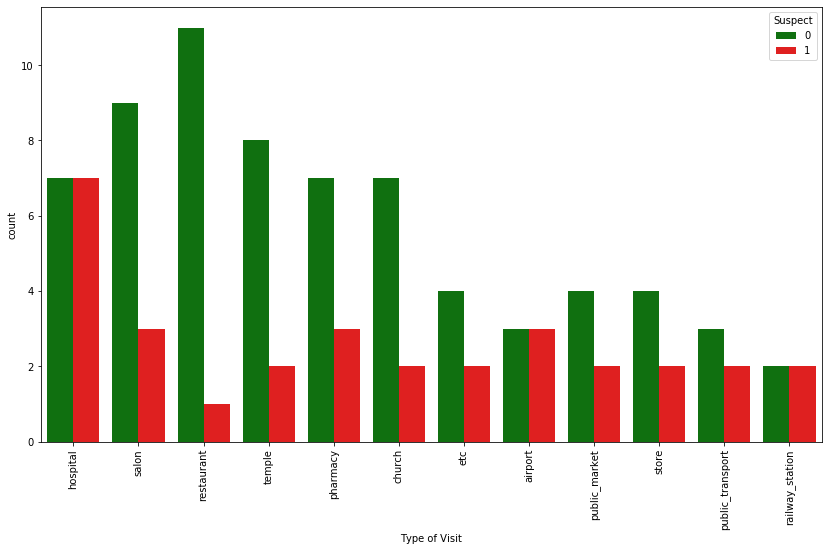

In [416]:
fig,ax=plt.subplots(figsize=(14,8))
g=sns.countplot(x='Type of Visit',hue='Suspect',data=df,ax=ax,order=df['Type of Visit'].value_counts().index,palette=['g','r'])
g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [417]:
df['Number of Cases'].unique()

array([  561,  8470,  1367,  4418,   807,  3758,    43,  9227,   971,
         981, 25992,  1924,  2205], dtype=int64)

[Text(0, 0, 'Kerala'),
 Text(0, 0, 'Delhi'),
 Text(0, 0, 'Telangana'),
 Text(0, 0, 'Rajasthan'),
 Text(0, 0, 'Haryana'),
 Text(0, 0, 'Uttar Pradesh'),
 Text(0, 0, 'Ladakh'),
 Text(0, 0, 'Tamil Nadu'),
 Text(0, 0, 'Jammu and Kashmir'),
 Text(0, 0, 'Karnataka'),
 Text(0, 0, 'Maharashtra'),
 Text(0, 0, 'Punjab'),
 Text(0, 0, 'Andhra Pradesh')]

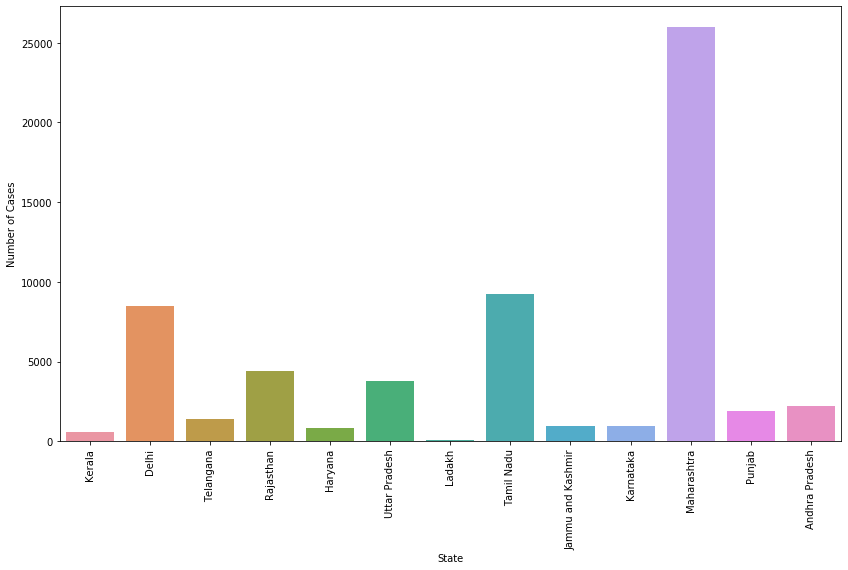

In [418]:
fig,ax=plt.subplots(figsize=(14,8))
g=sns.barplot(x='State',y='Number of Cases',data=df,ax=ax,)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [419]:
for i in range(len(df)):
    if ((df['Age'][i]>=0) and (df['Age'][i]<=10)):
        df['Age'][i]=0
    elif ((df['Age'][i]>10) and (df['Age'][i]<=20)):
        df['Age'][i]=1
    elif ((df['Age'][i]>20) and (df['Age'][i]<=30)):
        df['Age'][i]=2
    elif ((df['Age'][i]>30) and (df['Age'][i]<=40)):
        df['Age'][i]=3
    elif ((df['Age'][i]>40) and (df['Age'][i]<=50)):
        df['Age'][i]=4
    elif ((df['Age'][i]>50) and (df['Age'][i]<=60)):
        df['Age'][i]=5
    elif ((df['Age'][i]>60) and (df['Age'][i]<=70)):
        df['Age'][i]=6
    elif ((df['Age'][i]>70) and (df['Age'][i]<=80)):
        df['Age'][i]=7
    elif ((df['Age'][i]>80) and (df['Age'][i]<=90)):
        df['Age'][i]=8
    else:
        df['Age'][i]=9

In [420]:
Type_of_visit_mapping={'airport':0,'salon':1,'public_transport':2,'church':3,'temple':4,
                       'hospital':5,'store':6,'public_market':7,'pharmacy':8,'railway_station':9,'restaurant':10,'etc':11}
data=[df]
for row in data:
    row['Type of Visit']=row['Type of Visit'].map(Type_of_visit_mapping)

In [421]:
for row in data:
    row.loc[(row['Number of Cases'] >=0) & (row['Number of Cases'] <=500),'risk']=0
    row.loc[(row['Number of Cases'] >500) & (row['Number of Cases'] <=2000),'risk']=1
    row.loc[(row['Number of Cases'] >2000) & (row['Number of Cases'] <=5000),'risk']=2
    row.loc[(row['Number of Cases'] >5000),'risk']=3

In [422]:
df['risk']

0     1.0
1     1.0
2     1.0
3     3.0
4     1.0
     ... 
95    3.0
96    3.0
97    3.0
98    3.0
99    3.0
Name: risk, Length: 100, dtype: float64

In [423]:
df.dropna(axis=1)

,Age,Temperature,State,Type of Visit,Number of Cases,Suspect,risk
0,1,98.6,Kerala,0,561,0,1.0
1,3,98.6,Kerala,1,561,0,1.0
2,4,100.0,Kerala,2,561,0,1.0
3,4,101.0,Delhi,3,8470,1,3.0
4,2,98.6,Telangana,4,1367,0,1.0
...,...,...,...,...,...,...,...
95,5,98.6,Maharashtra,3,25992,0,3.0
96,2,102.3,Maharashtra,5,25992,0,3.0
97,4,100.0,Maharashtra,8,25992,1,3.0
98,1,98.6,Maharashtra,10,25992,0,3.0


In [424]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [425]:
X=df.loc[:,['Age','Temperature','Type of Visit','risk']]
y=df.loc[:,'Suspect']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.10, random_state=0)

In [433]:
classifier=DecisionTreeClassifier(min_samples_leaf=2,max_depth=2,random_state=0)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [434]:
y_pred=classifier.predict(X_test)

In [435]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)

In [436]:
cm

array([[5, 0],
       [3, 2]], dtype=int64)